In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [2]:
postulantes_gen_edad = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv',low_memory=False)

In [3]:
postulantes_gen_edad.head(5)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [4]:
postulantes_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [5]:
postulantes_gen_edad['fechanacimiento'].isnull().any()

True

In [6]:
postulantes_gen_edad_sin_NaN = postulantes_gen_edad.dropna(subset=['fechanacimiento'])

quite las filas que poseen algun NaN de la columna fechanacimiento.

In [7]:
postulantes_gen_edad_sin_NaN['fechanacimiento'].isnull().any()

False

In [8]:
postulantes_gen_edad_sin_NaN['fechanacimiento'] = pd.to_datetime(postulantes_gen_edad_sin_NaN['fechanacimiento'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 31-12-11 00:00:00

In [9]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [10]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [11]:
postulantes_gen_edad_sin_NaN = postulantes_gen_edad_sin_NaN.reset_index(drop=True)

In [12]:
postulantes_gen_edad_copia = postulantes_gen_edad_sin_NaN.copy()

In [13]:
postulantes_gen_edad_copia['fechanacimiento']=postulantes_gen_edad_copia['fechanacimiento'].str.split("-")  

In [14]:
postulantes_gen_edad_sin_NaN.shape

(196138, 3)

In [15]:
for i in range(0,postulantes_gen_edad_copia.shape[0]):
    #print(postulantes_gen_edad_sin_NaN['fechanacimiento'][i][0])
    if (int(postulantes_gen_edad_copia['fechanacimiento'][i][0]) < 1678 ):
        postulantes_gen_edad_sin_NaN.drop(i, inplace=True)
        continue
    if (int(postulantes_gen_edad_copia['fechanacimiento'][i][1]) < 0 or int(postulantes_gen_edad_copia['fechanacimiento'][i][1]) > 12 ):
        postulantes_gen_edad_sin_NaN.drop(i, inplace=True)
        continue
    if (int(postulantes_gen_edad_copia['fechanacimiento'][i][2]) < 0 or int(postulantes_gen_edad_copia['fechanacimiento'][i][1]) > 31 ):
        postulantes_gen_edad_sin_NaN.drop(i, inplace=True)
        continue
    
    

Aca lo que se hizo fue quitar las filas que contienen un año,mes o dia invalido..

In [16]:
postulantes_gen_edad_sin_NaN.shape

(196131, 3)

In [17]:
postulantes_gen_edad_sin_NaN = postulantes_gen_edad_sin_NaN.reset_index(drop=True)

In [18]:
postulantes_gen_edad_sin_NaN.head(5)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [19]:
postulantes_gen_edad_sin_NaN['fechanacimiento'] = pd.to_datetime(postulantes_gen_edad_sin_NaN['fechanacimiento'])

In [20]:
now = pd.Timestamp(datetime.datetime.now())  

In [21]:
postulantes_gen_edad_sin_NaN['age'] = (now - postulantes_gen_edad_sin_NaN['fechanacimiento']).astype('timedelta64[Y]').astype(int)

In [22]:
postulantes_gen_edad_sin_NaN.head(5)

,idpostulante,fechanacimiento,sexo,age
0,NM5M,1970-12-03,FEM,47
1,5awk,1962-12-04,FEM,55
2,ZaO5,1978-08-10,FEM,39
3,NdJl,1969-05-09,MASC,48
4,eo2p,1981-02-16,MASC,37


In [23]:
postulantes_gen_edad_sin_NaN = postulantes_gen_edad_sin_NaN.sort_values(by='age',ascending=False)

Text(0,0.5,'Cantidad de postulantes')

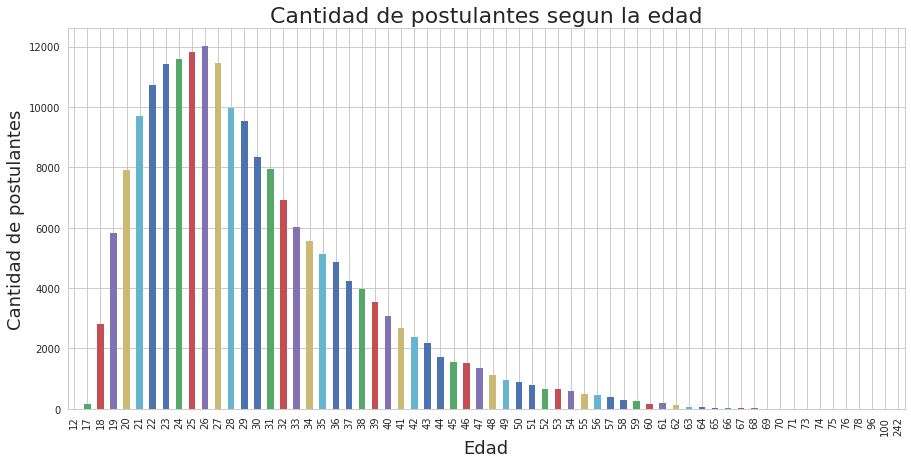

In [24]:
g = postulantes_gen_edad_sin_NaN['age'].value_counts().sort_index(ascending=True).plot.bar(figsize=(15,7))
g.set_title("Cantidad de postulantes segun la edad", fontsize=22)
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

In [25]:
postulaciones = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_4_postulaciones.csv',low_memory=False)

In [26]:
postulaciones.shape

(3401623, 3)

In [27]:
postulaciones.loc[postulaciones['idpostulante'].isin(postulantes_gen_edad_sin_NaN['idpostulante'])].shape

(3357121, 3)

lo que hice con "postulaciones.loc[postulaciones['idpostulante'].isin(postulantes_gen_edad_sin_NaN['idpostulante'])]"
es filtrar en postulaciones por todos los id que tenga que coincidan en postulaciones_edad

In [28]:
df_a = postulaciones.loc[postulaciones['idpostulante'].isin(postulantes_gen_edad_sin_NaN['idpostulante'])]

In [29]:
df_a.shape

(3357121, 3)

In [30]:
df_b = postulantes_gen_edad_sin_NaN.copy()

In [31]:
result = pd.merge(df_a, df_b, on='idpostulante', how='inner')

In [32]:
result.head(4)

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,age
0,1112257047,NM5M,2018-01-15 16:22:34,1970-12-03,FEM,47
1,1111920714,NM5M,2018-02-06 09:04:50,1970-12-03,FEM,47
2,1112346945,NM5M,2018-02-22 09:04:47,1970-12-03,FEM,47
3,1112345547,NM5M,2018-02-22 09:04:59,1970-12-03,FEM,47


In [33]:
del result['fechanacimiento']

In [34]:
del result['sexo']

In [35]:
result.head(4)

,idaviso,idpostulante,fechapostulacion,age
0,1112257047,NM5M,2018-01-15 16:22:34,47
1,1111920714,NM5M,2018-02-06 09:04:50,47
2,1112346945,NM5M,2018-02-22 09:04:47,47
3,1112345547,NM5M,2018-02-22 09:04:59,47


In [36]:
df_a = result.loc[result['age'] == 26]

In [37]:
df_a.head(4)

,idaviso,idpostulante,fechapostulacion,age
12361,1112247023,NZKzML,2018-01-16 16:01:51,26
12362,1112278961,NZKzML,2018-01-26 18:04:05,26
12363,1112293412,NZKzML,2018-01-26 18:05:16,26
12364,1112294610,NZKzML,2018-01-29 15:09:46,26


In [38]:
ids = df_a['idpostulante'].unique()

aca me quedaron todos los id que tienen 26 años y sin repetir

In [39]:
df_a[df_a['idpostulante']=='eQavz2'].head(4)

,idaviso,idpostulante,fechapostulacion,age
16195,1112267388,eQavz2,2018-01-18 08:57:41,26
16196,1112246199,eQavz2,2018-01-18 08:59:55,26
16197,1112247187,eQavz2,2018-01-18 09:00:29,26
16198,1111902649,eQavz2,2018-01-18 09:00:44,26


In [40]:
(df_a[df_a['idpostulante']=='eQavz2'])['idaviso'].head(4)

16195    1112267388
16196    1112246199
16197    1112247187
16198    1111902649
Name: idaviso, dtype: int64

In [41]:
list_avisos = []
for i_post in ids:
    for i_av in (df_a[df_a['idpostulante']==i_post])['idaviso']:
        if i_av not in list_avisos:
            list_avisos.append(i_av)

en lista_avisos quedaron todos los avisos a los que se postularon los de edad 26

In [42]:
avisos_det = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_6_avisos_detalle.csv',low_memory=False)

In [43]:
df_a = avisos_det.loc[avisos_det['idaviso'].isin(list_avisos)]

Text(0,0.5,'Cantidad de postulaciones')

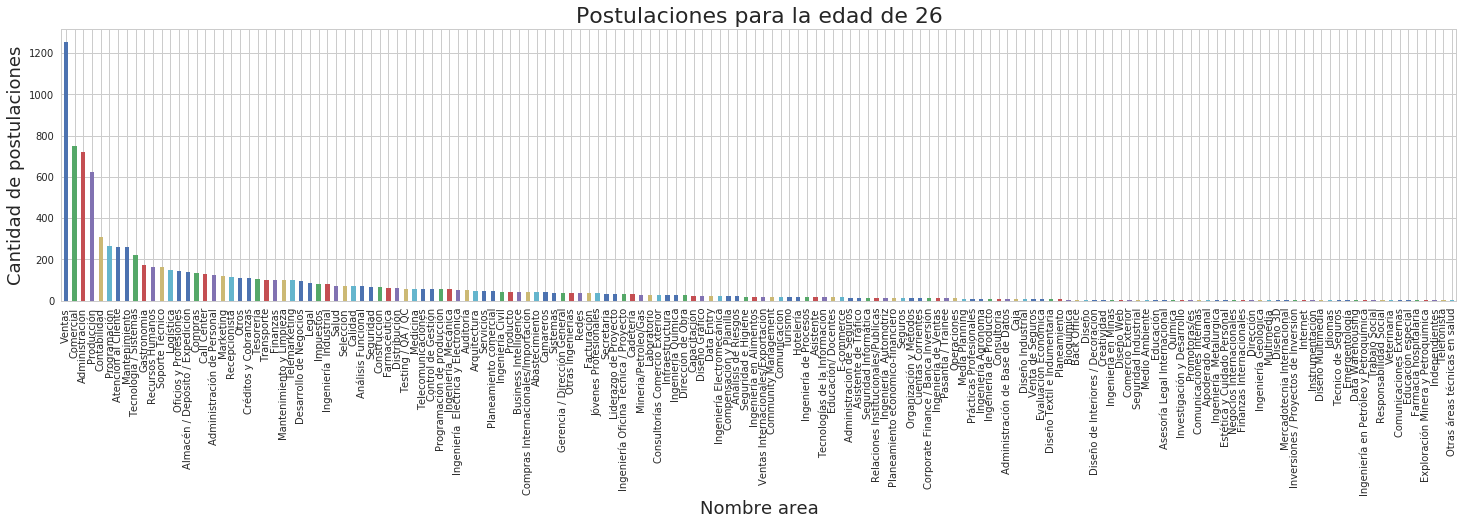

In [44]:
g = df_a['nombre_area'].value_counts().plot.bar(figsize=(25,5))
g.set_title("Postulaciones para la edad de 26", fontsize=22)
g.set_xlabel("Nombre area",fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)

In [45]:
avisos_vistos = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_3_vistas.csv',low_memory=False)

In [46]:
avisos_vistos.shape

(961897, 3)

In [47]:
avisos_vistos.loc[avisos_vistos['idpostulante'].isin(postulantes_gen_edad_sin_NaN['idpostulante'])].shape

(939117, 3)

In [48]:
vistos_edad = avisos_vistos.loc[avisos_vistos['idpostulante'].isin(postulantes_gen_edad_sin_NaN['idpostulante'])]

In [49]:
result2 = pd.merge(vistos_edad, df_b, on='idpostulante', how='inner')

In [50]:
result2.head(3)

,idAviso,timestamp,idpostulante,fechanacimiento,sexo,age
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,1991-11-16,MASC,26
1,1112301574,2018-02-27T11:28:37.162-0500,YjVJQ6Z,1991-11-16,MASC,26
2,1112319451,2018-02-27T11:26:31.101-0500,YjVJQ6Z,1991-11-16,MASC,26


In [51]:
df_a = result2.loc[result2['age'] == 26]

In [52]:
ids2 = df_a['idpostulante'].unique()

In [53]:
for i_post in ids2:
    for i_av_v in (df_a[df_a['idpostulante']==i_post])['idAviso']:
        if i_av_v not in list_avisos:
            list_avisos.append(i_av_v)

In [54]:
df_a = avisos_det.loc[avisos_det['idaviso'].isin(list_avisos)]

Text(0,0.5,'Cantidad de avisos')

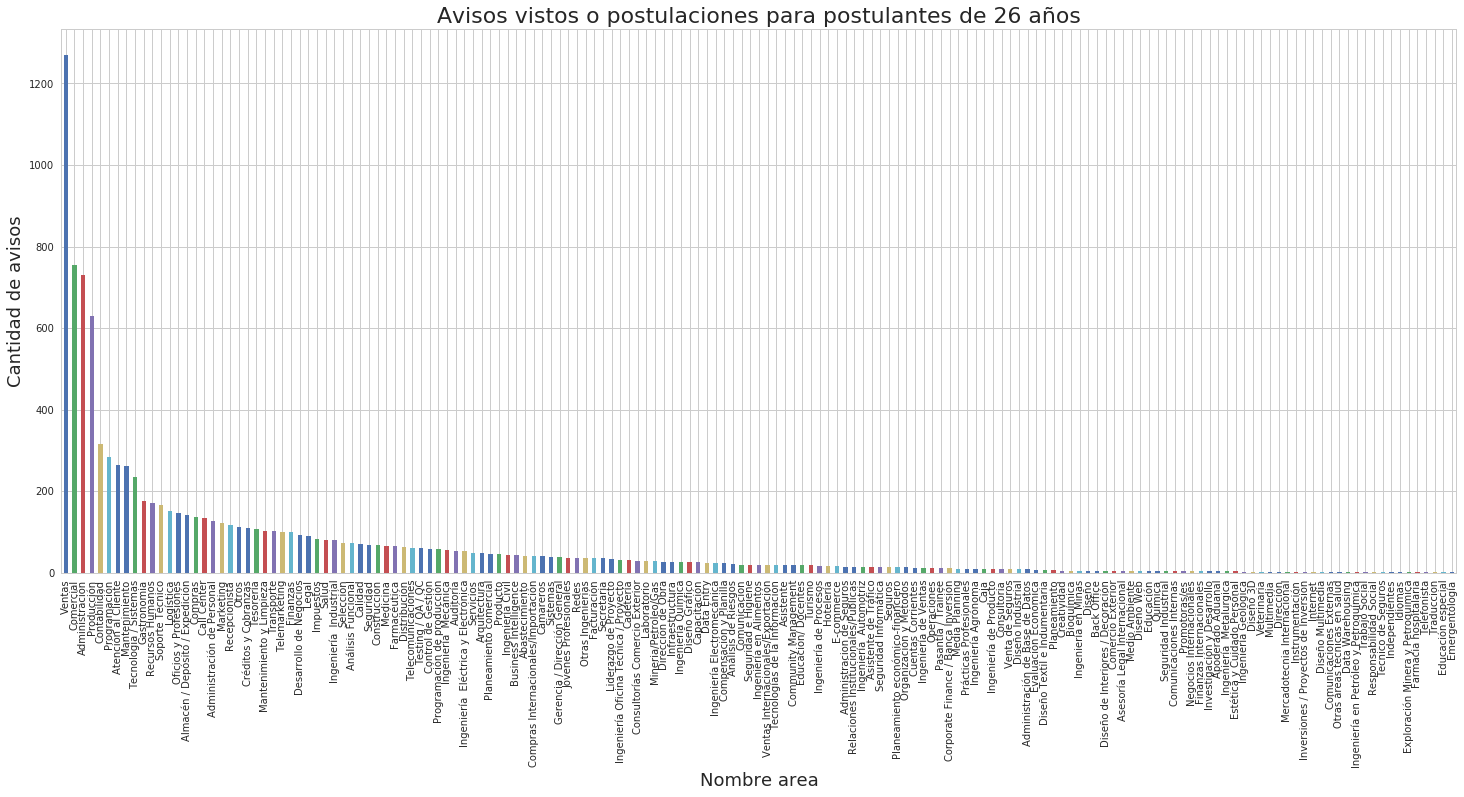

In [55]:
g = df_a['nombre_area'].value_counts().plot.bar(figsize=(25,10))
g.set_title("Avisos vistos o postulaciones para postulantes de 26 años", fontsize=22)
g.set_xlabel("Nombre area",fontsize=18)
g.set_ylabel("Cantidad de avisos", fontsize=18)

Text(0,0.5,'Cantidad de avisos')

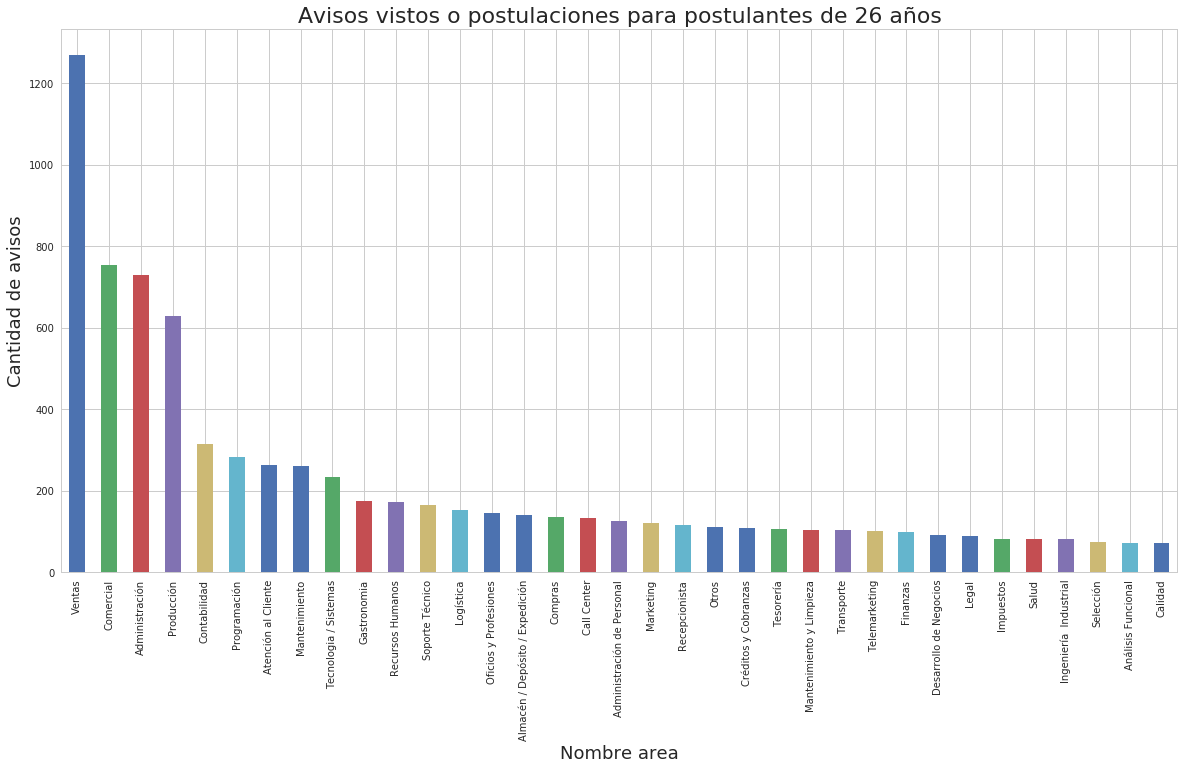

In [56]:
g = (df_a['nombre_area'].value_counts(ascending=False))[0:35].plot.bar(figsize=(20,10))
g.set_title("Avisos vistos o postulaciones para postulantes de 26 años", fontsize=22)
g.set_xlabel("Nombre area",fontsize=18)
g.set_ylabel("Cantidad de avisos", fontsize=18)

La idea ahora sería, yo me postule al aviso 1112257047 y me interesaría tener recomendaciones de otros avisos similares a los que otras personas que se hayan postulado a este. Entonces se traeran todos los avisos de los que se postularon al 1112257047 siendo todos del mismo area.

In [57]:
postulaciones.loc[postulaciones['idaviso'] == 1112257047].head(3)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
4298,1112257047,1kJqGb,2018-01-15 10:23:11
4782,1112257047,eOE9Rr,2018-01-15 10:42:07


In [58]:
aviso_post_yo_y_otros = postulaciones.loc[postulaciones['idaviso'] == 1112257047] #supongo

In [59]:
lista_otros_postulantes = aviso_post_yo_y_otros['idpostulante'].tolist()

In [60]:
lista_otros_postulantes.remove('NM5M') #supongo ese mi idpostulante

In [61]:
lista_avisos_recomendar = []
for postulante in lista_otros_postulantes:
    for id_aviso in (postulaciones[postulaciones['idpostulante'] == postulante])['idaviso']:
        if id_aviso not in lista_avisos_recomendar:
            lista_avisos_recomendar.append(id_aviso)
    for id_aviso in (avisos_vistos[avisos_vistos['idpostulante'] == postulante])['idAviso']:
        if id_aviso not in lista_avisos_recomendar:
            lista_avisos_recomendar.append(id_aviso)

In [64]:
nomb_area_deseado = ((avisos_det.loc[avisos_det['idaviso'] == 1112257047])['nombre_area'].tolist())[0]

In [65]:
print(nomb_area_deseado)

Atención al Cliente


In [66]:
avisos_a_recom =  (avisos_det.loc[avisos_det['idaviso'].isin(lista_avisos_recomendar)]).loc[avisos_det['nombre_area']==nomb_area_deseado] 

In [67]:
avisos_a_recom.head(5)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
9,1001202662,1,"promotor/a , asesor/a",<p>En Cerantola nos encontramos en la busqueda...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Atención al Cliente,cerantola
101,1111562107,1,Operador Telefónico Atención al Cliente -Turno...,<p>En Red Link creemos en el trabajo en equipo...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Atención al Cliente,RED LINK SA
146,1111696162,1,Gerentes de Local/ Supervisores de Turno (CABA...,<p>Nos encontramos en la búsqueda de <strong>t...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Atención al Cliente,Starbucks
147,1111696171,1,Gerente de Local - Neuquén,<p>Nos encontramos en la búsqueda de <strong>t...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Atención al Cliente,Starbucks
190,1111888240,1,Operador de Call Center,<p><strong>Somos una importante Empresa multin...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Atención al Cliente,ITURAN ROAD TRACK ARGENTINA SA


In [68]:
avisos_online = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_5_avisos_online.csv',low_memory=False)

In [128]:
avisos_a_recom = pd.merge(avisos_a_recom, avisos_online, on='idaviso', how='inner') # los avisos a recomendar unicamente serían los avisos online.

In [129]:
result.head(4)

,idaviso,idpostulante,fechapostulacion,age
0,1112257047,NM5M,2018-01-15 16:22:34,47
1,1111920714,NM5M,2018-02-06 09:04:50,47
2,1112346945,NM5M,2018-02-22 09:04:47,47
3,1112345547,NM5M,2018-02-22 09:04:59,47


In [143]:
df_g = result.copy()

In [226]:
result_group= df_g.groupby(['idaviso','age']).size().reset_index(name='counts')

In [227]:
result_group.head(4)

,idaviso,age,counts
0,8725750,19,4
1,8725750,20,4
2,8725750,21,2
3,8725750,22,10


In [235]:
df_result = result_group.merge(avisos_det[['idaviso','nombre_area']])

In [236]:
del df_result['idaviso']

hasta aca lo que tengo en fg_result es segun la edad la cantidad de postulaciones a avisos de un tipo de area

In [248]:
aux = df_result.groupby(['nombre_area','age']).sum()

In [249]:
aux.head(4)

counts
nombre_area    age        
Abastecimiento 17        7
               18      174
               19      373
               20      554

In [258]:
datos_heat_map = aux.unstack(level=-1).fillna(0)

In [259]:
datos_heat_map.head(4)

counts                                         \
age                                12    17      18      19      20       21    
nombre_area                                                                     
Abastecimiento                     0.0   7.0   174.0   373.0   554.0    641.0   
Administracion de Seguros          0.0   4.0    32.0    68.0   128.0    178.0   
Administración                     0.0  70.0  1901.0  5373.0  8745.0  13057.0   
Administración de Base de Datos    0.0   0.0     3.0     8.0    19.0     18.0   

                                                                    ...        \
age                                  22       23       24       25  ...   70    
nombre_area                                                         ...         
Abastecimiento                     719.0    725.0    722.0    671.0 ...   0.0   
Administracion de Seguros          209.0    283.0    276.0    310.0 ...   0.0   
Administración                   15750.0  19180.0  20633.0  21047.0 ...   0.0   
Administración de Base de Datos     19.0     21.0     29.0     37.0 ...   0.0   

                                                                              
age                              71   73   74   75   76   78   96   100  242  
nombre_area                                                                   
Abastecimiento                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Administracion de Seguros        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Administración                   0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
Administración de Base de Datos  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  

[4 rows x 64 columns]

In [260]:
datos_heat_map.columns = datos_heat_map.columns.droplevel(0)

In [261]:
datos_heat_map.head(4)

age,12,17,18,19,20,21,22,23,24,25,...,70,71,73,74,75,76,78,96,100,242
nombre_area,,,,,,,,,,,,,,,,,,,,,
Abastecimiento,0.0,7.0,174.0,373.0,554.0,641.0,719.0,725.0,722.0,671.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Administracion de Seguros,0.0,4.0,32.0,68.0,128.0,178.0,209.0,283.0,276.0,310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Administración,0.0,70.0,1901.0,5373.0,8745.0,13057.0,15750.0,19180.0,20633.0,21047.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Administración de Base de Datos,0.0,0.0,3.0,8.0,19.0,18.0,19.0,21.0,29.0,37.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


Text(248.5,0.5,'Categoría')

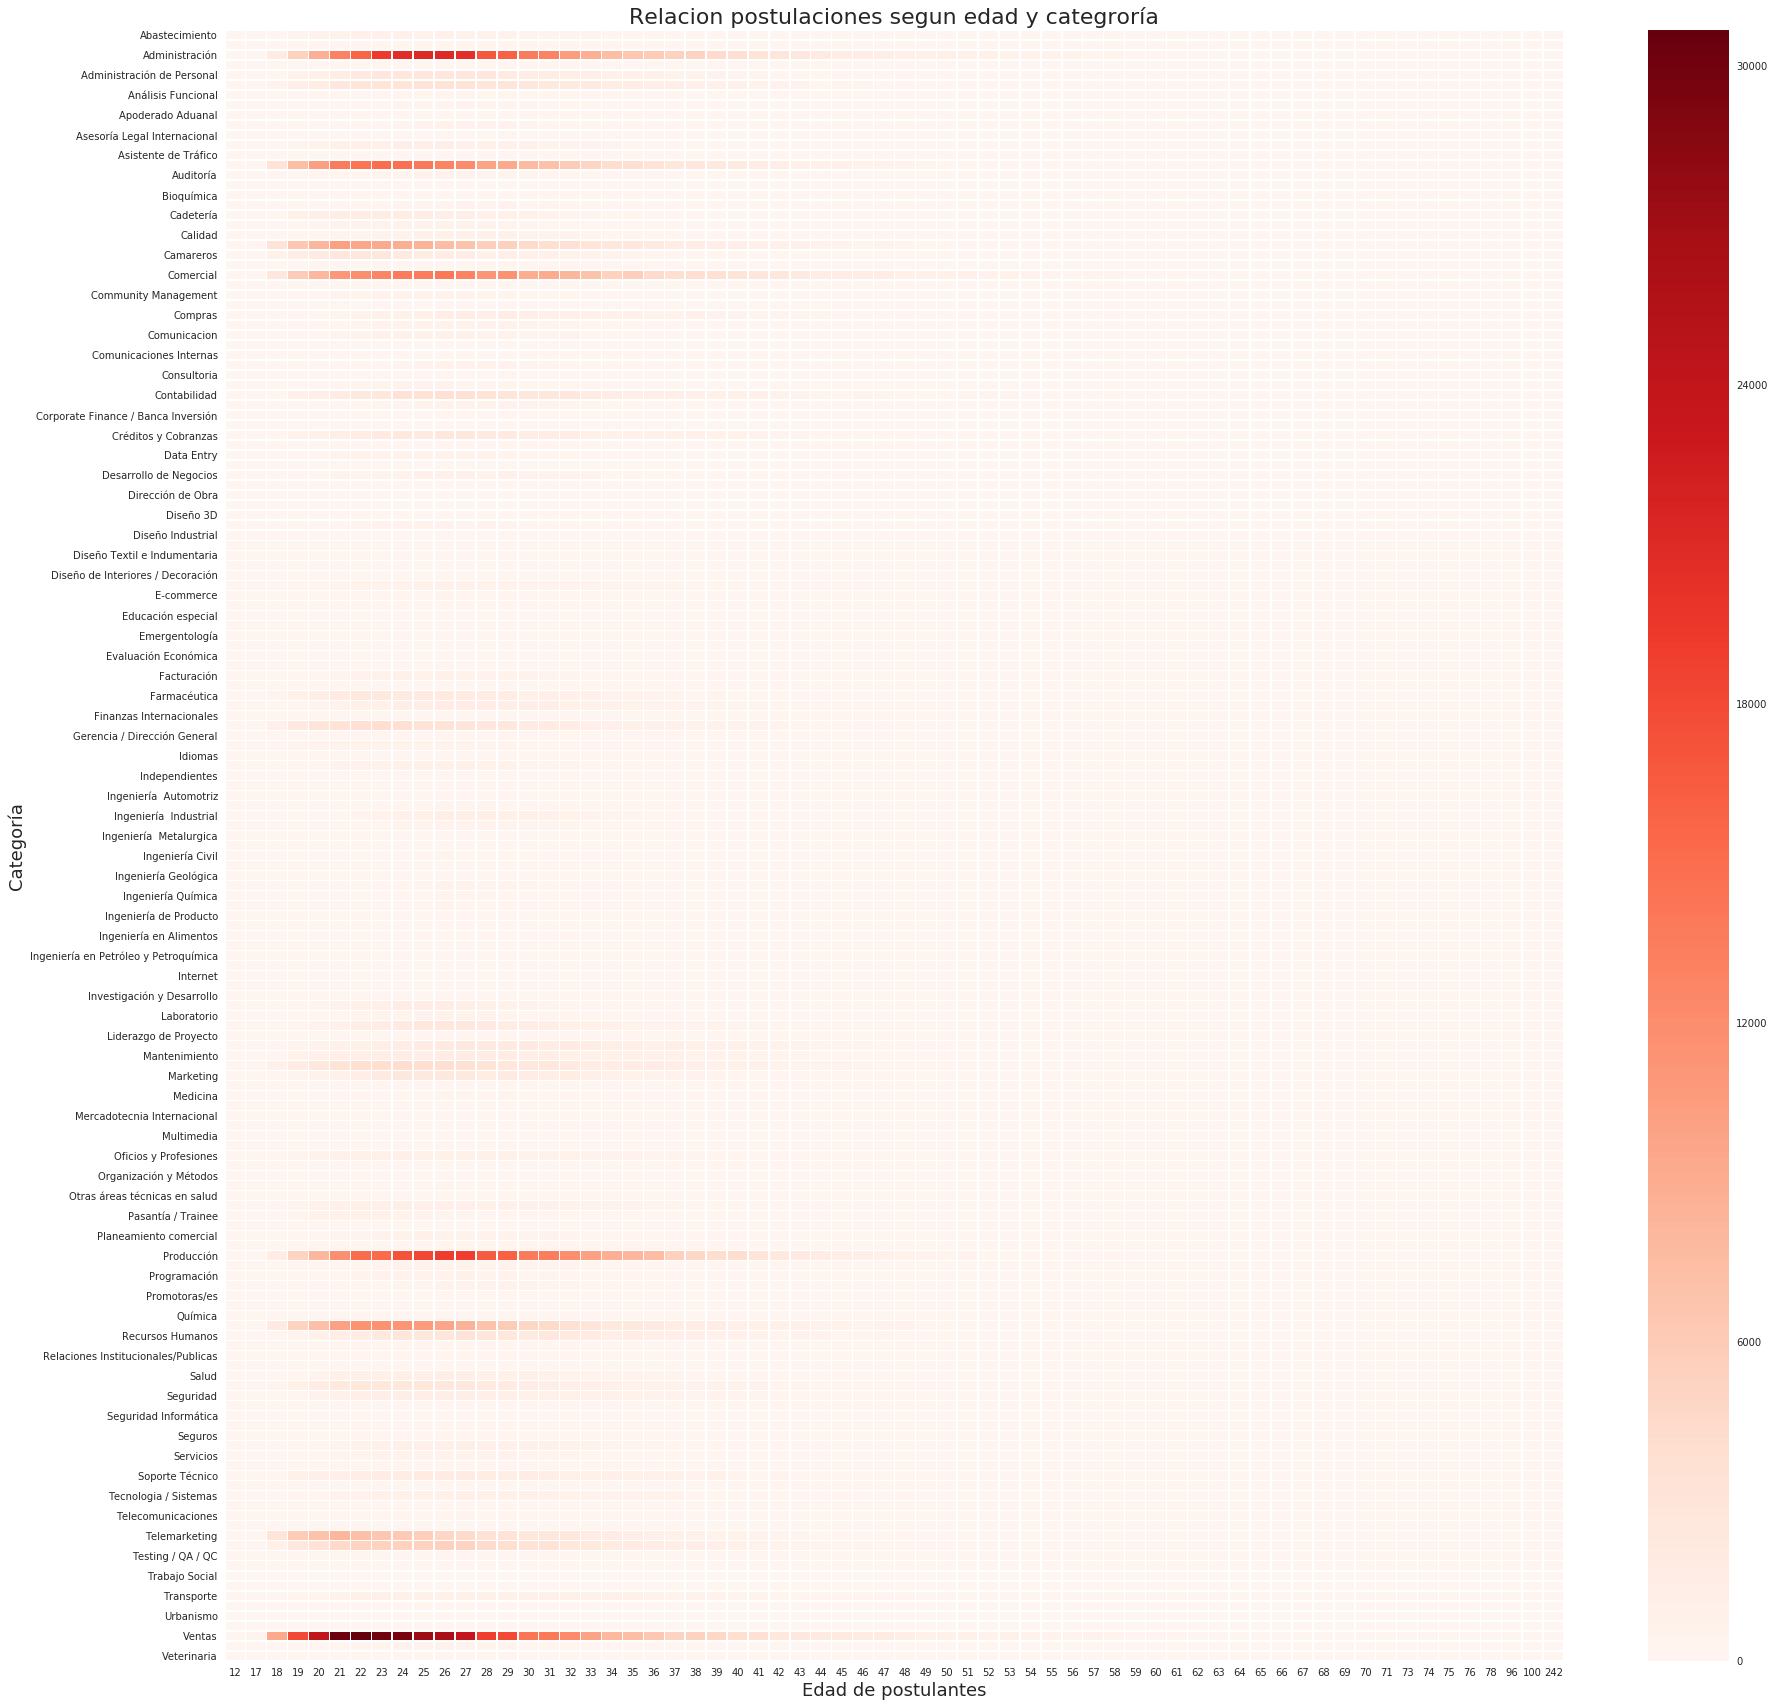

In [264]:
fig, ax = plt.subplots(figsize=(30,30))
g = sns.heatmap(datos_heat_map,  cmap="Reds",ax=ax,linewidths=.5)
g.set_title("Relacion postulaciones segun edad y categroría", fontsize=22)
g.set_xlabel("Edad de postulantes",fontsize=18)
g.set_ylabel("Categoría", fontsize=18)